## Etude d'un système chaotique via la fonction logistique

Nous allons ici étudier le comportement de la fonction dite "logistique" proposée par le mathématicien belge Paul-François Verhulst, au XIXè siècle. A partir de cette fonction, on peut construire une suite récurente de la forme $x_{i+1} = f(x_i)$ où $f$ est la fontion logistique : $f(x) = r (1-x) x$, où $r$ représente le taux d'accroissement maximal de la population.
Cette fonction est très utile en dynamique des population. Une des particularité de cette fonction est son extrème sensibilité àà la valeur de $r$. En effet, de petites variation de $r$ entrainent des comportements de la suite géométrique totalement différents les uns des autres.

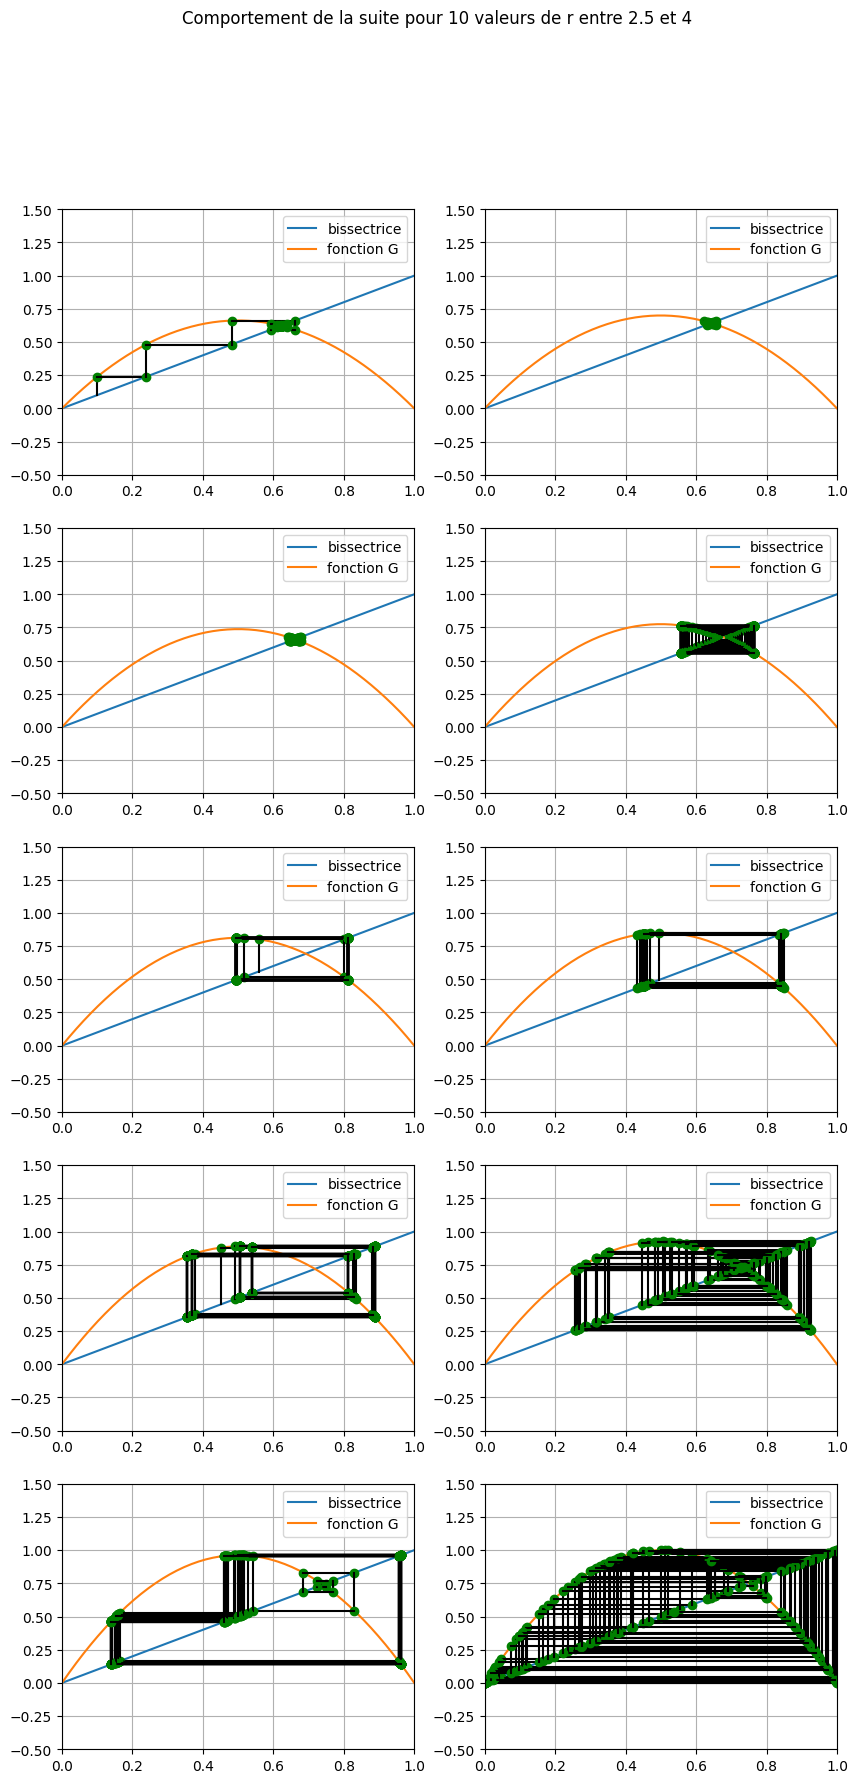

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation de la suite
u0 = 0.1

r = 2.5

#création d'une grille de 10 représentations graphiques 
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i in range (1, 11): 
    
    # Positionnement de la sous-fenêtre
    plt.subplot(5, 2, i)
    plt.suptitle('Comportement de la suite pour 10 valeurs de r entre 2.5 et 4')
    
    r = r+0.15

    #définition de la fonction 
    def G(x):
        '''retourne l'élément G(n) de la suite'''
        return r*(1-x)*x

    # Limites des abscisses
    xi = 0
    xe = 1
    #nombres de termes 
    N = 100

    # Tracé de la bissectrice, de la fonction G et de la suite
    x = np.linspace(xi, xe)
    plt.plot(x, x, label = "bissectrice")
    plt.plot(x, G(x), label = "fonction G")  
    plt.xlim(0, 1)
    plt.ylim(-1/2, 1.5)
    plt.legend()
    plt.grid()
    
    # Récurrence
    for k in range(N):
        # Étape 2 : image du point U0 avec une ligne 
        #   verticale -> U_01
        u1 = G(u0)
        plt.plot([u0, u0], [u0, u1], 'k')
        plt.plot([u0], [u1], 'og')
        # Étape 3 : placer le point U1 sur la bissectrice 
        #   avec une ligne horizontale depuis U_01
        plt.plot([u0, u1], [u1, u1], 'k')
        plt.plot([u1], [u1], 'og')
        # Récurrence :
        u0 = u1

On voit ici qu'avec un pas de 0.1, chaque valeurs de r succéssive aboutit à un comportement de la suite completement différent du précédent, et ce sans logique à priori.

## Diagramme de bifurcation

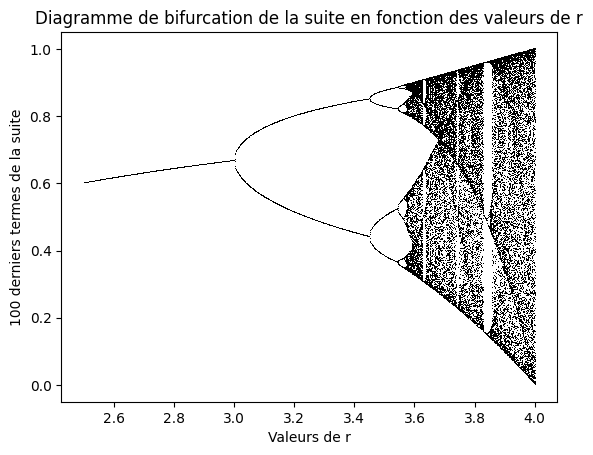

In [31]:
import matplotlib.pyplot as plt
import numpy as np

N=1500 #nombre d'itérations totales
r_valeurs = np.linspace(2.5, 4, 1000)  #tableau des valeurs de r
x0 = 0.00001 #init

liste_vide = [] #création d'une liste vide pour classer toutes les valeurs de la suite

for r in r_valeurs:
    for i in range(N):
        x1 = G(x0)
        x0 = x1
        liste_vide.append(G(x0))
    
    cents_dern_valeurs = liste_vide[-100:] #on stocke les 100 dernières valeurs dans une nouvelle liste !
    
    # Tracé du diagramme pour chaque valeur de r
    plt.plot([r] * 100, cents_dern_valeurs, "k,")
    
plt.xlabel("Valeurs de r")
plt.ylabel("100 derniers termes de la suite")
plt.title("Diagramme de bifurcation de la suite en fonction des valeurs de r")
plt.show()

On voit bien ici que pour des valeurs de $r$ comprises entre $2,5$ et $3$, la suite admet une limite bien définie. 
Pour r compris entre $3$ et $3,5$, la suite admet deux limites.
Au-dela de $3,5$, le système devient chaotique.
 .